In [1]:
%matplotlib inline


# Comparing level values for ``skimage.measure.find_contours``
Notebook adapted from https://scikit-image.org/docs/stable/auto_examples/edges/plot_contours.html

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from skimage import measure, data

# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

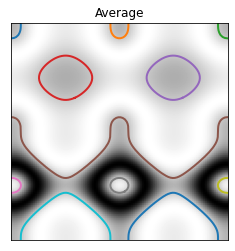

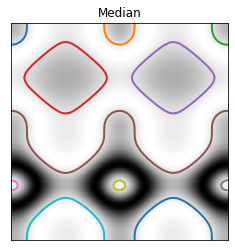

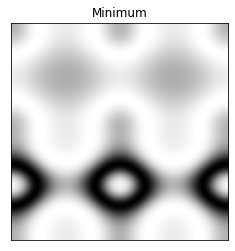

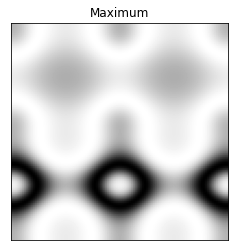

In [25]:
# Level options
levels = [lambda x: np.average(x), lambda x: np.median(x), lambda x: np.min(x), lambda x: np.max(x)]
func_names = ["Average", "Median", "Minimum", "Maximum"]

for i in range(len(levels)):
    contours = measure.find_contours(r, level=levels[i](r))

    # Display the image and plot all contours found
    fig, ax = plt.subplots()
    ax.imshow(r, cmap=plt.cm.gray)

    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title(func_names[i])
    plt.show()

### Binary array example
Adapted from https://stackoverflow.com/questions/50494541/bw-image-to-binary-array

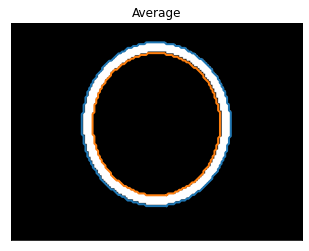

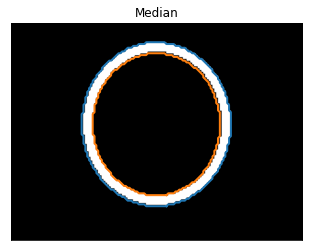

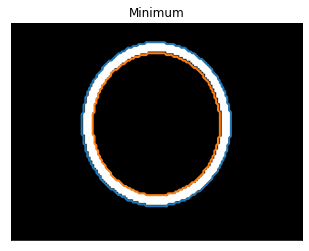

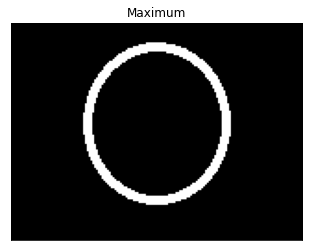

In [30]:
from PIL import Image

#Create binary image array
img = Image.open('bw_circle.png').convert('L')
np_img = np.array(img)
np_img = ~np_img  # invert B&W
np_img[np_img > 0] = 1

for i in range(len(levels)):
    contours = measure.find_contours(np_img, level=levels[i](np_img))

    # Display the image and plot all contours found
    fig, ax = plt.subplots()
    ax.imshow(np_img, cmap=plt.cm.gray)

    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title(func_names[i])
    plt.show()